Notebook to explore the methods in Tessa's talk on YouTube https://www.youtube.com/watch?v=49Uxg8F0WK8

In [2]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from pathlib import Path
from glob import glob

/Users/mikeg/miniforge3/envs/osfl2/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Get some long recordings

In [9]:
recording_path = Path('../../../data/raw/recordings/OSFL')
recordings = glob(str(recording_path / '*'))
recordings[0]

'../../../data/raw/recordings/OSFL/recording-294258.mp3'

original_clip


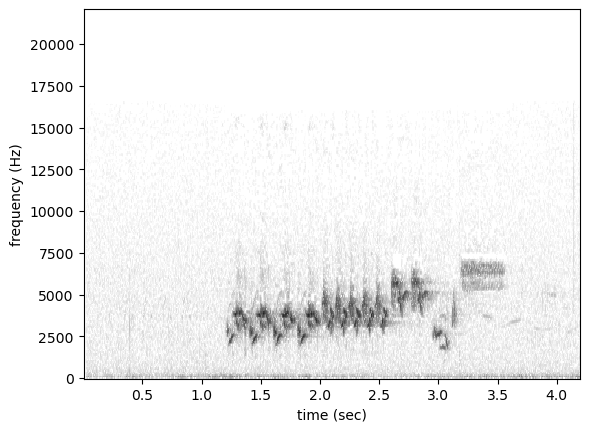

bandpassed_clip


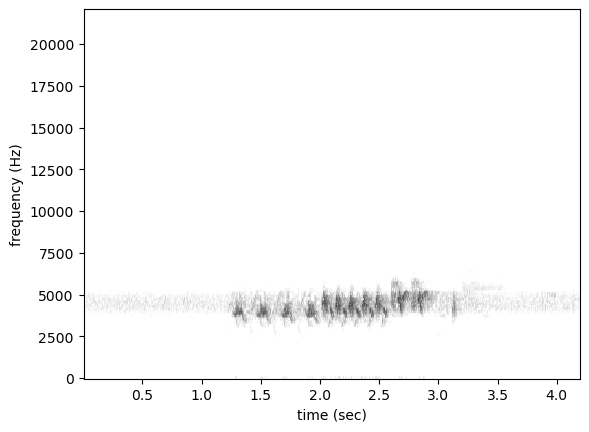

In [10]:
# Load a section of the orignal recordign and bandpass
original_clip = Audio.from_file(recordings[0]).trim(0, 4.2)
bp_clip = original_clip.bandpass(4000, 5000, 2)

print('original_clip')
Spectrogram.from_audio(original_clip).plot()
print('bandpassed_clip')
Spectrogram.from_audio(bp_clip).plot()

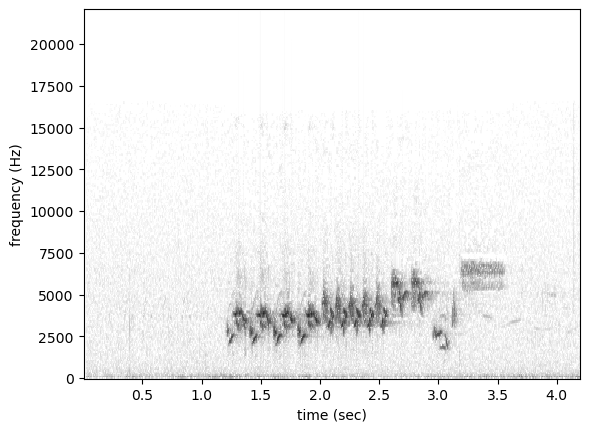

In [134]:
# change the window
Spectrogram.from_audio(original_clip, window_type = 'hamming').plot()

The hamming window introduces high frequencies which were not there previously. The blackman-harris and the hann window don't do this. 

# Try some different window lengths


window_samples = 256


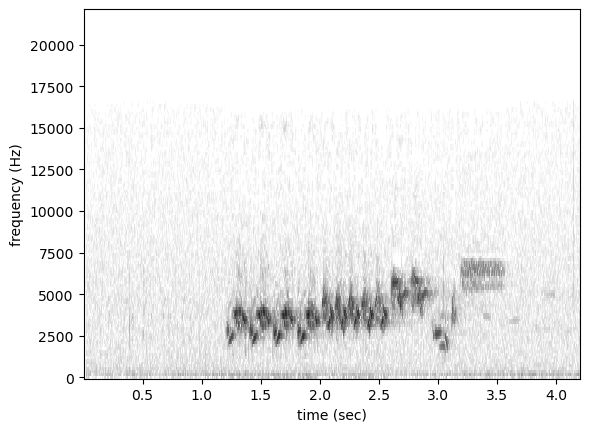

window_samples = 512


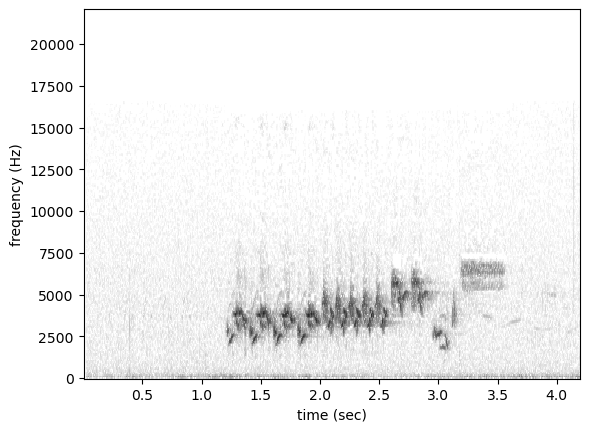

window_samples = 1024


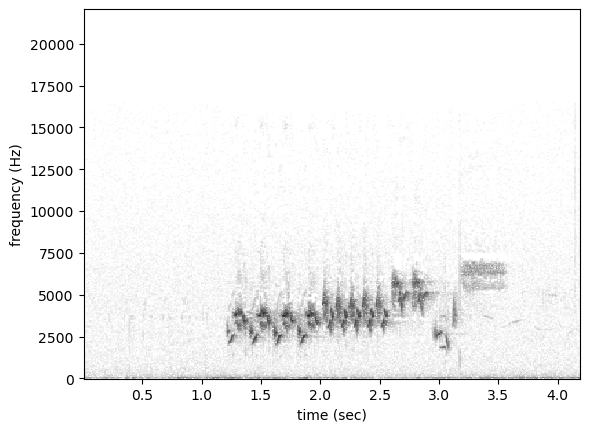

window_samples = 2048


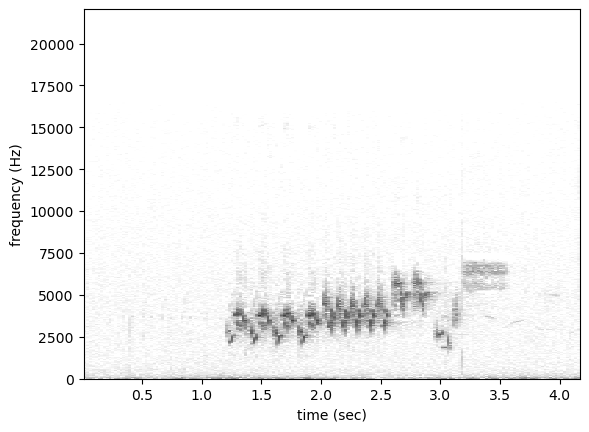

In [138]:
for n in range(8, 12):
    print(f"window_samples = {2**n}")
    Spectrogram.from_audio(original_clip, 
                       window_samples=2**n,
                       window_type='hann').plot()

# Try some different window types

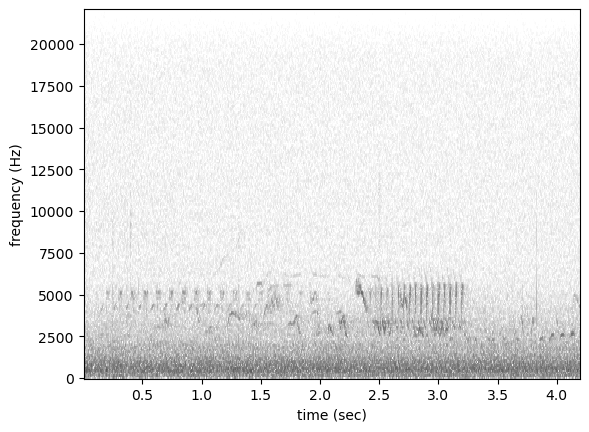

In [129]:
clip = Audio.from_file(recordings[3]).trim(0, 4.2)
Spectrogram.from_audio(clip).plot()

window_type = hann


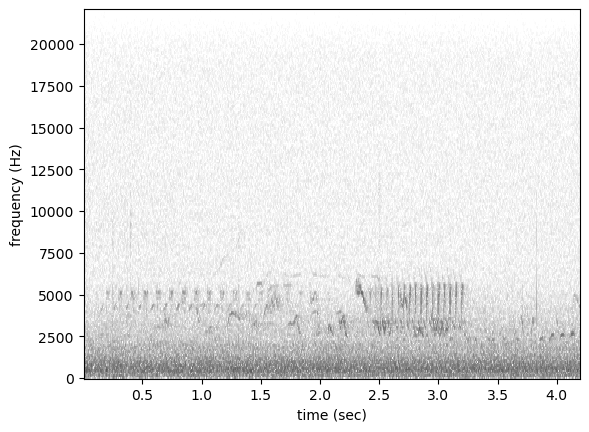

window_type = hamming


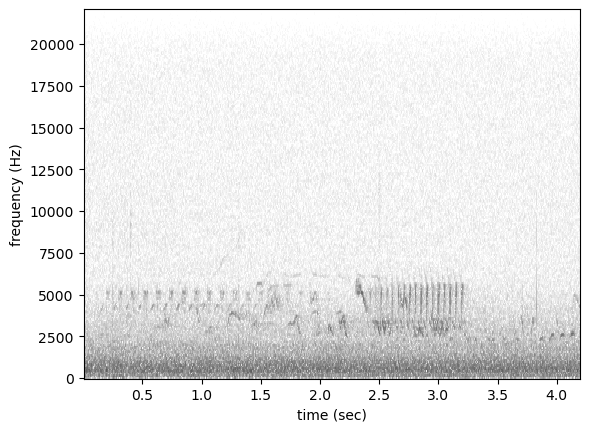

window_type = blackman


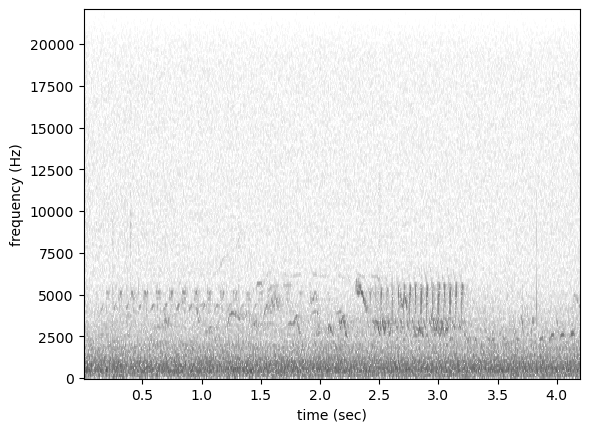

window_type = tri


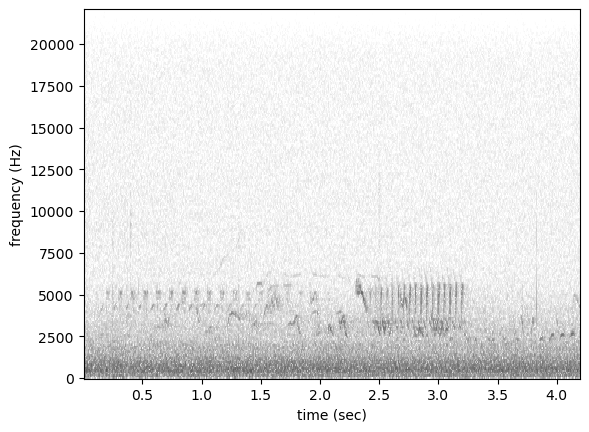

window_type = rect


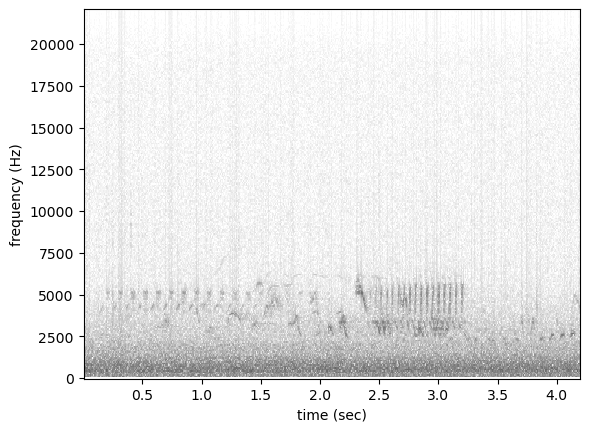

In [147]:
for window in ['hann', 'hamming', 'blackman', 'tri', 'rect']:
    print(f"window_type = {window}")
    Spectrogram.from_audio(clip, 
                       window_samples=512,
                       window_type=window).plot()


In [148]:
clip.metadata

{'comment': 'Processed by SoX',
 'samplerate': 44100,
 'format': 'FLAC',
 'frames': 7938000,
 'sections': 1,
 'subtype': 'PCM_16',
 'channels': 1,
 'duration': 4.2}